In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
import math
import seaborn

In [3]:
c=sp.special.comb(31000,63)

In [7]:
c*(0.00203**63)*((1-0.00203)**(31000-63))

0.05024468664277072

In [9]:
63/31000

0.002032258064516129

In [37]:
c2 = sp.special.comb(31000,63)

In [38]:
c2*((39/31000)**39)*((1-(39/31000))**(31000-39))

0.06378567544093659

In [117]:
stats.binom.pmf(39,31000,(63/31000))

0.0003165012580502242

In [104]:
sp.stats.binom.interval(.05,31000, (63/31000), loc=0)

(62.0, 63.0)

In [16]:
stats.binom.cdf(39,31000,(39/31000))-stats.binom.cdf(63,31000,(63/31000))

0.00900857085886364

In [18]:
stats.poisson.cdf(31000,39)-stats.poisson.cdf(31000,63)

0.0

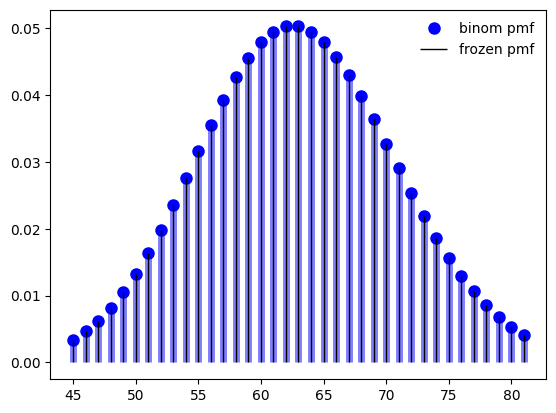

In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
n, p = 31000, (63/31000)

mean, var, skew, kurt = binom.stats(31000, (63/31000), moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),

              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')

ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,

        label='frozen pmf')

ax.legend(loc='best', frameon=False)

plt.show()

In [7]:
stats.binom_test(39, n=31000, p=(0.00203), alternative='less')

0.0008074555188959496

In [133]:
stats.binom_test((63-24), n=31000, p=(63/31000), alternative='two-sided')

0.0015700232304146143

In [3]:
stats.binom.cdf(39,31000,0.00203)

0.0008074555188959496

### lecture 2.4

In [41]:
table = np.array([[39,30961],[63,30937]])

In [42]:
res =stats.fisher_exact([[39,30961],[63,30937]], alternative='less')

In [44]:
res

(0.6185677526719483, 0.011094091841433758)

In [46]:
stats.norm.cdf(-3.0268)

0.0012357871459340907

In [47]:
table = np.array([.9,-.9,4.3,2.9,1.2,3,2.7,.6,3.6,-.5])

In [48]:
table

array([ 0.9, -0.9,  4.3,  2.9,  1.2,  3. ,  2.7,  0.6,  3.6, -0.5])

In [49]:
print(table)

[ 0.9 -0.9  4.3  2.9  1.2  3.   2.7  0.6  3.6 -0.5]


In [52]:
mean = np.mean(table)

In [53]:
mean

1.78

In [55]:
unbvar = np.var(table, ddof=1)

In [56]:
unbvar

3.1262222222222227

In [73]:
p = stats.ttest_1samp(table, 0,alternative='greater')

In [74]:
p

Ttest_1sampResult(statistic=3.1835383022188735, pvalue=0.005560692749284678)

In [61]:
import math
mean*math.sqrt(10)/(unbvar)

1.8005291482761383

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chisquare

# Generate random data
data = table

# Fit a normal distribution to the data
param = norm.fit(data)

# Calculate the likelihood of the data given the normal distribution parameters
ll_null = norm.logpdf(data, loc=param[0], scale=param[1]).sum()

# Fit an alternative distribution to the data
param_alt = norm.fit(data, floc=0)

# Calculate the likelihood of the data given the alternative distribution parameters
ll_alt = norm.logpdf(data, loc=param_alt[0], scale=param_alt[1]).sum()

# Calculate the likelihood ratio test statistic
lr = 2 * (ll_alt - ll_null)

# Calculate the p-value
p = chisquare.sf(lr, 1)

print("Likelihood Ratio Test Statistic:", lr)
print("P-value:", p)

In [5]:
-2*math.log(stats.binom.pmf(39,31000,102/62000) * stats.binom.pmf(63,31000,102/62000) / (stats.binom.pmf(39,31000,39/31000) * stats.binom.pmf(63,31000,63/31000)))

5.709660479762178

In [7]:
stats.chi2.sf(5.71, 1)

0.016868539397458002

In [8]:
stats.binom.pmf(39,31000,102/62000)

0.013674024512554268

## Correlation and Least Squares Regression

In [2]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

XY = np.array([Xs,Ys])
XY

array([[ 3.39e-02,  4.23e-02,  2.13e-01,  2.57e-01,  2.73e-01,  2.73e-01,
         4.50e-01,  5.03e-01,  5.03e-01,  6.37e-01,  8.05e-01,  9.04e-01,
         9.04e-01,  9.10e-01,  9.10e-01,  1.02e+00,  1.11e+00,  1.11e+00,
         1.41e+00,  1.72e+00,  2.03e+00,  2.02e+00,  2.02e+00,  2.02e+00],
       [-1.93e+01,  3.04e+01,  3.87e+01,  5.52e+00, -3.31e+01, -7.73e+01,
         3.98e+02,  4.06e+02,  4.36e+02,  3.20e+02,  3.73e+02,  9.39e+01,
         2.10e+02,  4.23e+02,  5.94e+02,  8.29e+02,  7.18e+02,  5.61e+02,
         6.08e+02,  1.04e+03,  1.10e+03,  8.40e+02,  8.01e+02,  5.19e+02]])

In [3]:
my = np.mean(Ys)
mx = np.mean(Xs)
print(mx, my)

0.9199250000000001 425.6175


In [4]:
np.var(Ys)

116547.86537708332

In [5]:
stdx = np.std(Xs,ddof=1)
stdx

0.6533948258734996

In [6]:
stdy = np.std(Ys,ddof=1)
stdy

348.7336574977229

In [7]:
np.cov(XY,bias=True)

array([[4.09136265e-01, 1.83240104e+02],
       [1.83240104e+02, 1.16547865e+05]])

In [8]:
arrayx = np.subtract(Xs,mx)

In [9]:
arrayy = np.subtract(Ys,my)

In [10]:
mult = arrayx*arrayy

In [11]:
suma =np.sum(mult)

In [12]:
const = (N-1)**(-1)

In [13]:
XYcov = const*suma
print("XY covariance is equal to", XYcov)

XY covariance is equal to 191.20706528260865


#### Correlation Coefficient 

In [14]:
normx = arrayx/stdx
normy =arrayy/stdy

In [15]:
multnorm = normx*normy

In [16]:
sumanorm = np.sum(multnorm)

In [17]:
rxy = const*sumanorm

In [18]:
rxy

0.8391399162310663

In [19]:
beta1 = rxy*(stdy/stdx)

In [20]:
beta1

447.8705991409983

In [21]:
b0 = my-beta1*mx

In [22]:
b0

13.6101390852171

## Correlation and Least Squares Relationship

In [28]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

In [29]:
my = np.mean(Ys)
mx = np.mean(Xs)

In [30]:
stdx = np.std(Xs,ddof=1)

In [31]:
stdy = np.std(Ys,ddof=1)

In [32]:
arrayx = np.subtract(Xs,mx)
arrayy = np.subtract(Ys,my)
normx = arrayx/stdx
normy =arrayy/stdy
multnorm = normx*normy
sumanorm = np.sum(multnorm)
rxy = const*sumanorm
rxy

0.34394167021658206

<AxesSubplot: >

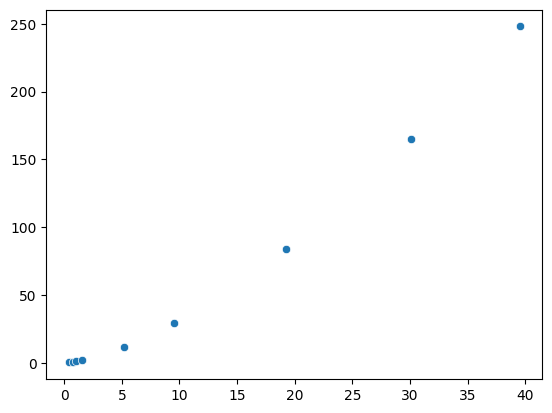

In [37]:
seaborn.scatterplot(x=Xs,y=Ys)

In [38]:
np.corrcoef(Xs,Ys)

array([[1.       , 0.9888323],
       [0.9888323, 1.       ]])

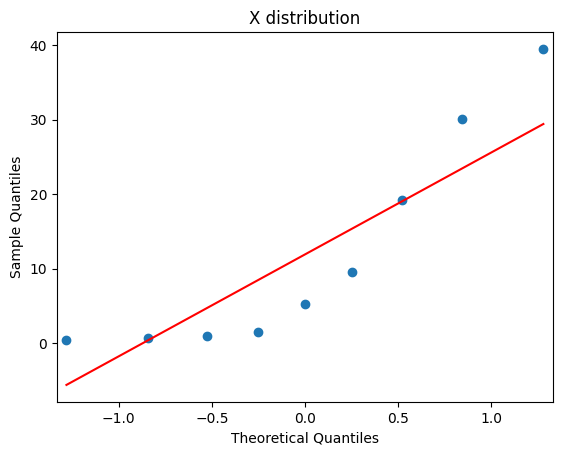

In [44]:
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

### Now lets transform the data to fit into a linear regression, let's transform both X and Y using the log function

<AxesSubplot: >

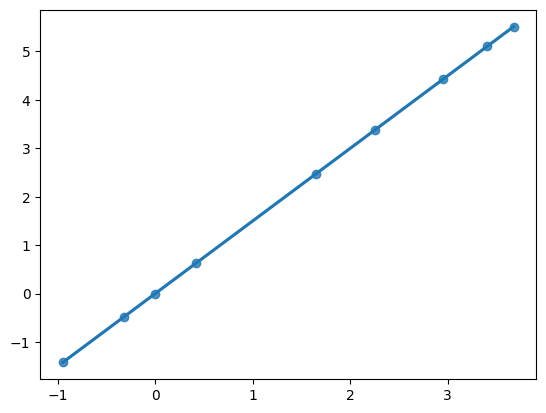

In [46]:
seaborn.regplot(x=np.log(Xs),y=np.log(Ys))

### the residual plot must not have a pattern, if there is a pattern the correlation is not linear

<AxesSubplot: >

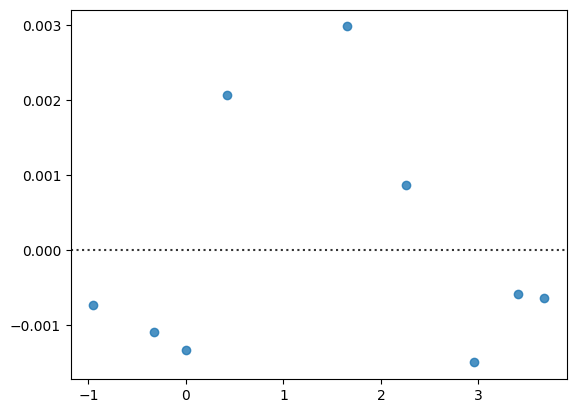

In [47]:
seaborn.residplot(x=np.log(Xs),y=np.log(Ys))

In [2]:
print('test')

test
